# ML Lab 3

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Let's take a look at our dataset and perform EDA for them

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
print("Shape:", dataset.shape)

Shape: (891, 12)


In [4]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
dataset.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
dataset.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
137,138,0,1,"Futrelle, Mr. Jacques Heath",male,37.0,1,0,113803,53.1000,C123,S
106,107,1,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S


We also want to know about the type of each column:

In [7]:
dataset.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Check if there are any duplicates in the dataset:

In [8]:
dataset.duplicated().sum()

0

So there are none

Let's also check if there are missings in the dataset:

In [9]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Oh, it seems like there are too many missings in the column "Cabin". Let's drop it.

In [10]:
dataset.drop(['Cabin'], axis=1, inplace=True)

In [11]:
print("Shape:", dataset.shape)
dataset.head()

Shape: (891, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Let's also drop the columns "PassengerId", "Name" and "Ticket" as they are not useful for our analysis.

In [12]:
dataset.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

To use in the future, let's also leave out the column "Survived" from the dataset:

In [13]:
survived = dataset["Survived"]
dataset.drop(['Survived'], axis=1, inplace=True)

In [14]:
print("Shape:", dataset.shape)
dataset.head()

Shape: (891, 7)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Distinguish categorical and numerical columns:

In [15]:
categorical_features = ["Pclass", "Sex", "Embarked"]
numerical_features = ["Age", "SibSp", "Parch", "Fare"]

In [16]:
for col in categorical_features:
    dataset[col] = dataset[col].astype("category")

Take a look at the unique values of the categorical columns:

In [17]:
for col in categorical_features:
    print(col, dataset[col].unique())

Pclass [3, 1, 2]
Categories (3, int64): [1, 2, 3]
Sex ['male', 'female']
Categories (2, object): ['female', 'male']
Embarked ['S', 'C', 'Q', NaN]
Categories (3, object): ['C', 'Q', 'S']


We also have to deal with the missings in the column "Embarked". Let's fill them with "Unknown":

In [18]:
dataset["Embarked"] = dataset["Embarked"].cat.add_categories("Unknown")
dataset["Embarked"].fillna("Unknown", inplace=True)

In [19]:
for col in categorical_features:
    print(col, dataset[col].unique())

Pclass [3, 1, 2]
Categories (3, int64): [1, 2, 3]
Sex ['male', 'female']
Categories (2, object): ['female', 'male']
Embarked ['S', 'C', 'Q', 'Unknown']
Categories (4, object): ['C', 'Q', 'S', 'Unknown']


Let's also take a look at the distribution of the other categorical columns:

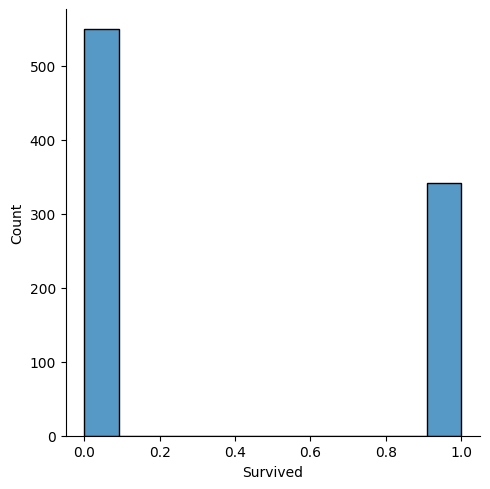

In [33]:
sns.displot(survived, kde=False)

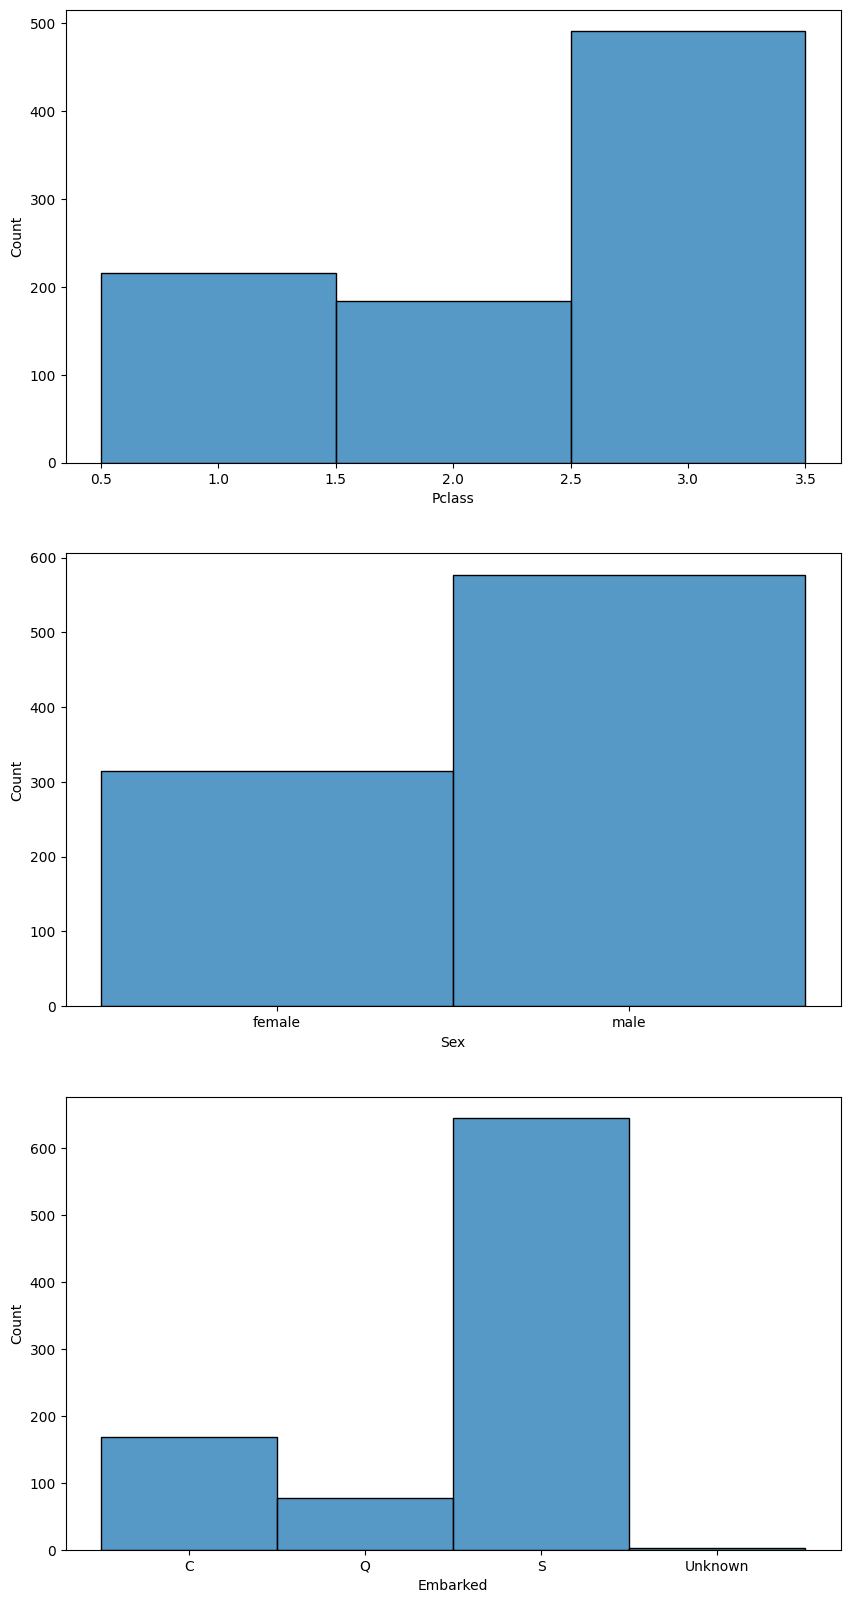

In [20]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1)
fig.set_size_inches(10, 20)

for i, col in enumerate(categorical_features):
    sns.histplot(dataset[col], kde=False, ax=axes[i])
plt.show()

Let's also take a look at the distribution of the numerical columns:

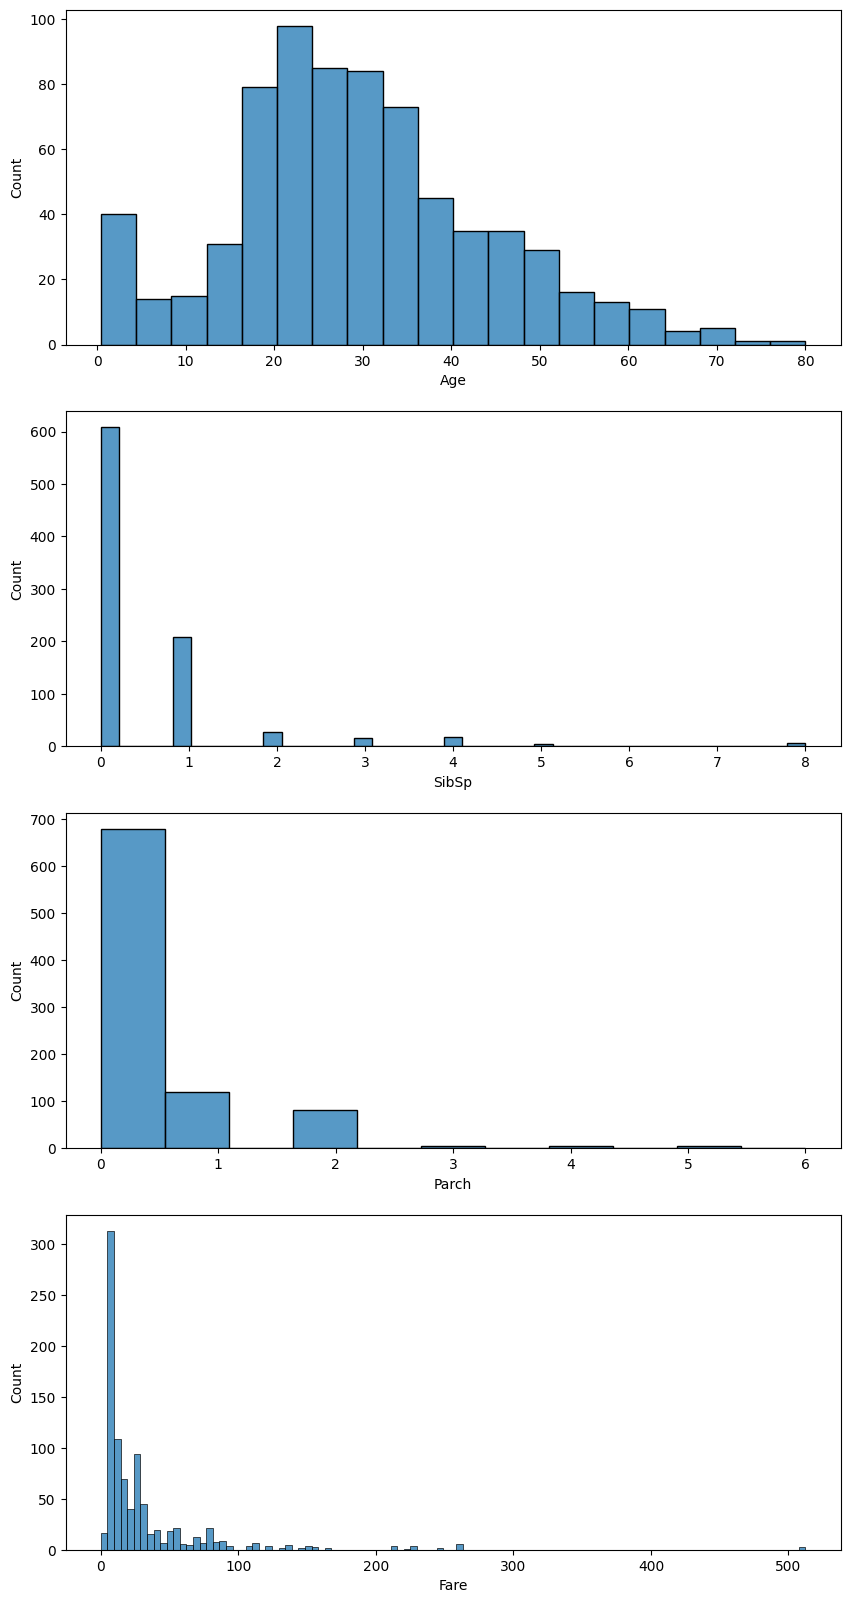

In [21]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(10, 20)

for i, col in enumerate(numerical_features):
    sns.histplot(dataset[col], kde=False, ax=axes[i])
plt.show()

So now we can start filling missings in the column "Age". Let's take a look at the outliers first:

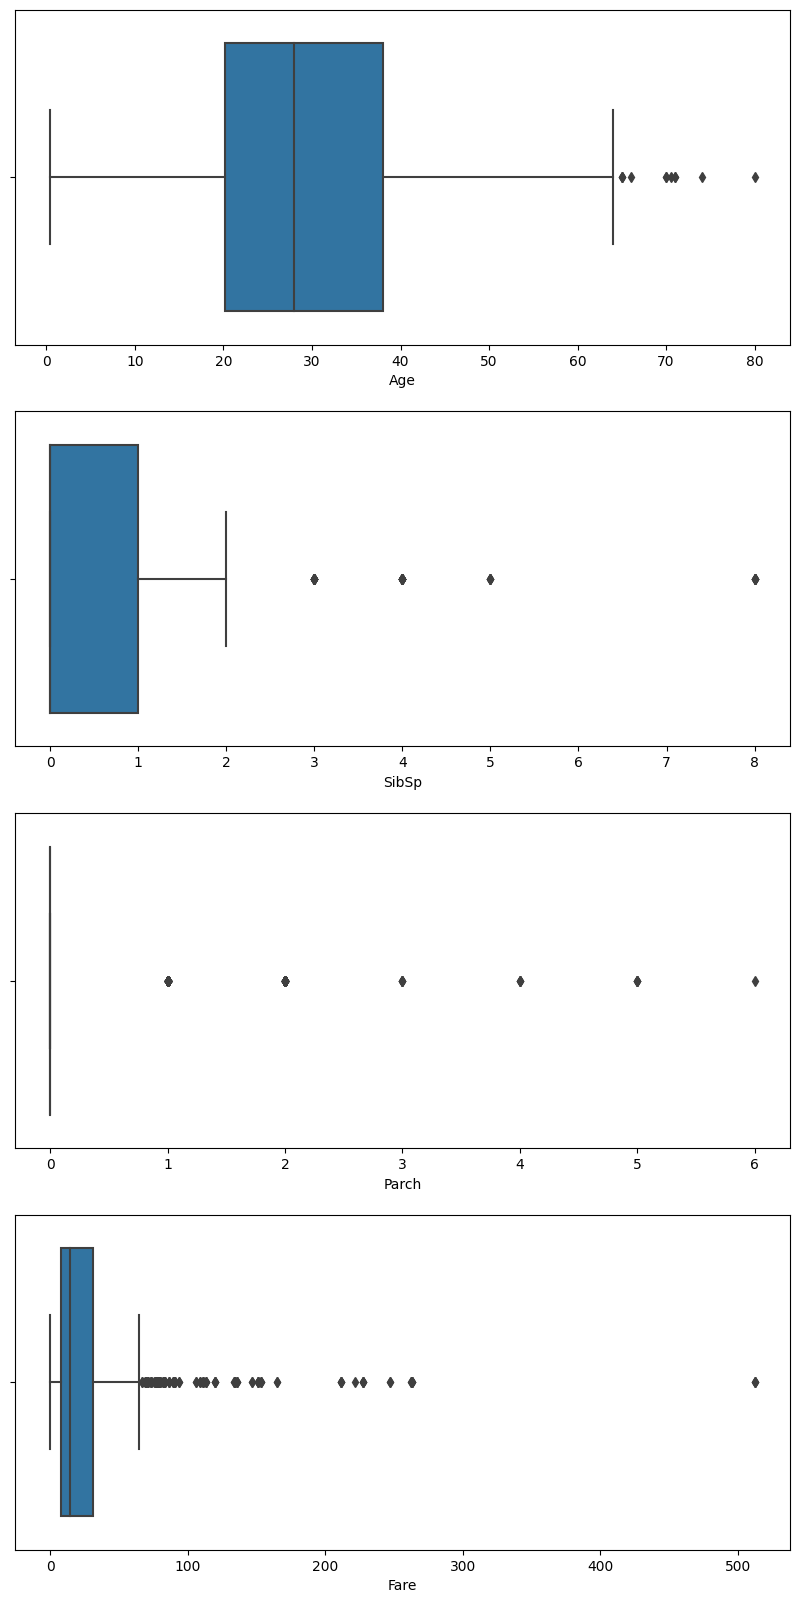

In [22]:
fig, axes = plt.subplots(nrows=(len(numerical_features)), ncols=1)
fig.set_size_inches(10, 20)
for i, col in enumerate(numerical_features):
    sns.boxplot(x=dataset[col], ax=axes[i])
plt.show()

Oh, it seems like the column "Fare" has the value that is too far from the others. Let's take a look at it:

In [23]:
dataset[dataset["Fare"] > 300]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,female,35.0,0,0,512.3292,C
679,1,male,36.0,0,1,512.3292,C
737,1,male,35.0,0,0,512.3292,C


But they are valid values, so we will leave them as they are.

Don't forget about the column "Age". Let's fill the missings with the median:

In [24]:
dataset["Age"].fillna(dataset["Age"].mean(), inplace=True)

In [25]:
dataset.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

So now we have no missings in the dataset. But we also have to deal with the transforming our dataset. Let's use the ColumnTransformer with the OneHotEncoder and the StandardScaler for that:

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [27]:
data_transformer = ColumnTransformer(transformers=[
    ("categorical_features", OneHotEncoder(), categorical_features),
    ("numerical_features", StandardScaler(), numerical_features)
])

In [28]:
data_transformed = pd.DataFrame(data_transformer.fit_transform(dataset))

print("Shape:", data_transformed.shape)
data_transformed

Shape: (891, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.592481,0.432793,-0.473674,-0.502445
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.638789,0.432793,-0.473674,0.786845
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.284663,-0.474545,-0.473674,-0.488854
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.407926,0.432793,-0.473674,0.420730
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.407926,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,-0.207709,-0.474545,-0.473674,-0.386671
887,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.823344,-0.474545,-0.473674,-0.044381
888,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.432793,2.008933,-0.176263
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,-0.284663,-0.474545,-0.473674,-0.044381


And now it's time to cluster our dataset. Let's use the KMeans algorithm for that first:

In [29]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [30]:
kmeans = KMeans(n_clusters=2, n_init="auto")
kmeans.fit(data_transformed)

KMeans(n_clusters=2, n_init='auto')

To visualize the clusters, let's use the PCA which allows us to reduce the dimensionality of our dataset (so-called dimensionality reduction):

In [31]:
pca = PCA(n_components=2)
pca.fit(data_transformed)

PCA(n_components=2)

<Axes: xlabel='pca1', ylabel='pca2'>

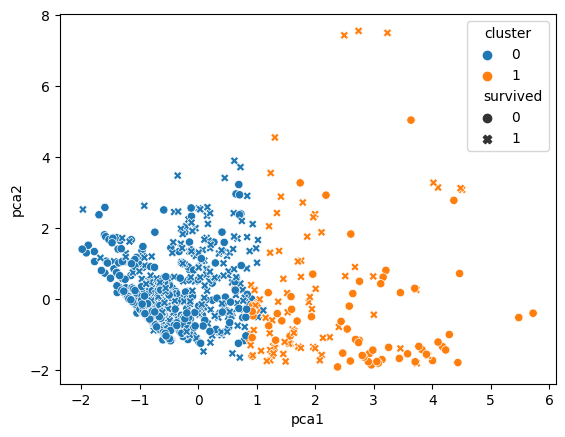

In [36]:
pca_data = pd.DataFrame(pca.transform(data_transformed), columns=["pca1", "pca2"])

pca_data["cluster"] = pd.Categorical(kmeans.labels_)
pca_data["survived"] = pd.Categorical(survived)

sns.scatterplot(data=pca_data, x="pca1", y="pca2", hue="cluster", style="survived")

Let's try another number of clusters:

In [37]:
kmeans = KMeans(n_clusters=4, n_init="auto")
kmeans.fit(data_transformed)

KMeans(n_clusters=4, n_init='auto')

<Axes: xlabel='pca1', ylabel='pca2'>

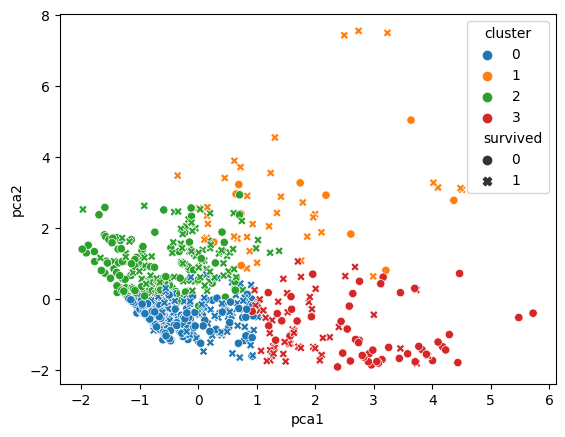

In [38]:
pca_data = pd.DataFrame(pca.transform(data_transformed), columns=["pca1", "pca2"])

pca_data["cluster"] = pd.Categorical(kmeans.labels_)
pca_data["survived"] = pd.Categorical(survived)

sns.scatterplot(data=pca_data, x="pca1", y="pca2", hue="cluster", style="survived")

Let's also try GaussianMixture:

In [40]:
from sklearn.mixture import GaussianMixture

In [48]:
gaussian_mixture = GaussianMixture(n_components=2, n_init=10, init_params="k-means++")
gaussian_mixture.fit(data_transformed)

GaussianMixture(init_params='k-means++', n_components=2, n_init=10)

In [49]:
labels = gaussian_mixture.predict(data_transformed)

<Axes: xlabel='pca1', ylabel='pca2'>

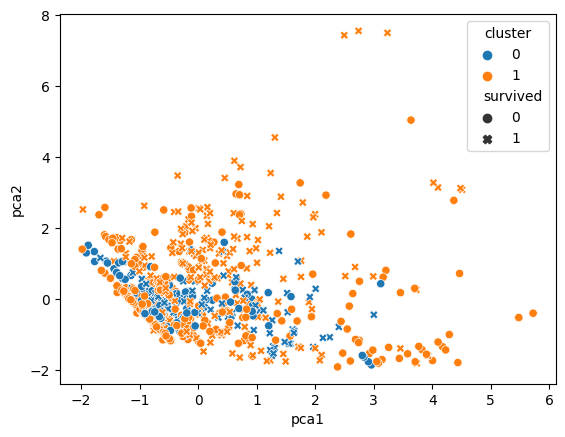

In [51]:
pca_data = pd.DataFrame(pca.transform(data_transformed), columns=["pca1", "pca2"])

pca_data["cluster"] = pd.Categorical(labels)
pca_data["survived"] = pd.Categorical(survived)

sns.scatterplot(data=pca_data, x="pca1", y="pca2", hue="cluster", style="survived")

In [53]:
gaussian_mixture = GaussianMixture(n_components=4, n_init=10, init_params="k-means++")
gaussian_mixture.fit(data_transformed)

GaussianMixture(init_params='k-means++', n_components=4, n_init=10)

In [54]:
labels = gaussian_mixture.predict(data_transformed)

<Axes: xlabel='pca1', ylabel='pca2'>

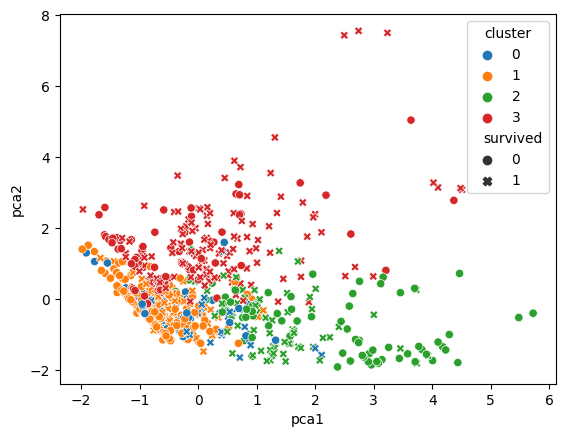

In [55]:
pca_data = pd.DataFrame(pca.transform(data_transformed), columns=["pca1", "pca2"])

pca_data["cluster"] = pd.Categorical(labels)
pca_data["survived"] = pd.Categorical(survived)

sns.scatterplot(data=pca_data, x="pca1", y="pca2", hue="cluster", style="survived")

So it seems like the gaussian mixture model works better than a common KMeans we tried earlier due to using multiple Gaussian distributions to fit arbitrarily shaped data

Now let's try the AgglomerativeClustering algorithm:

In [56]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=2, linkage="ward")
agglomerative_clustering.fit(data_transformed)

AgglomerativeClustering()

<Axes: xlabel='pca1', ylabel='pca2'>

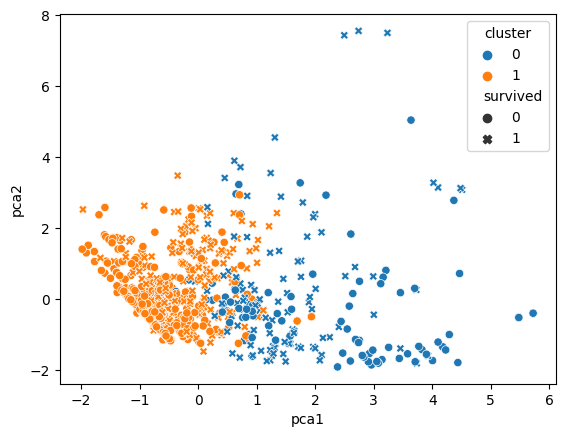

In [68]:
pca_data = pd.DataFrame(pca.transform(data_transformed), columns=["pca1", "pca2"])

pca_data["cluster"] = pd.Categorical(agglomerative_clustering.labels_)
pca_data["survived"] = pd.Categorical(survived)

sns.scatterplot(data=pca_data, x="pca1", y="pca2", hue="cluster", style="survived")

In [94]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=4, linkage="single")
agglomerative_clustering.fit(data_transformed)

AgglomerativeClustering(linkage='single', n_clusters=4)

<Axes: xlabel='pca1', ylabel='pca2'>

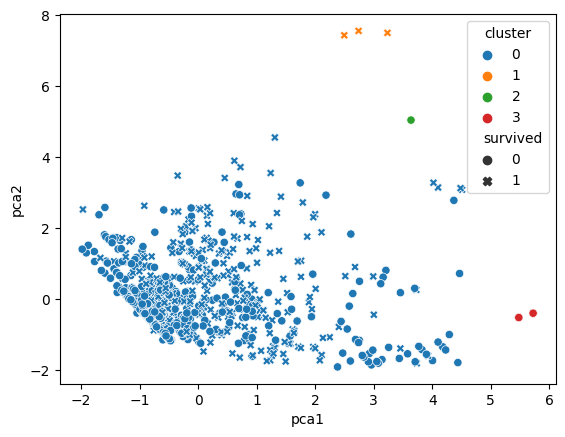

In [95]:
pca_data = pd.DataFrame(pca.transform(data_transformed), columns=["pca1", "pca2"])

pca_data["cluster"] = pd.Categorical(agglomerative_clustering.labels_)
pca_data["survived"] = pd.Categorical(survived)

sns.scatterplot(data=pca_data, x="pca1", y="pca2", hue="cluster", style="survived")

In [73]:
agglomerative_clustering = AgglomerativeClustering(n_clusters=4, linkage="ward")
agglomerative_clustering.fit(data_transformed)

AgglomerativeClustering(n_clusters=4)

<Axes: xlabel='pca1', ylabel='pca2'>

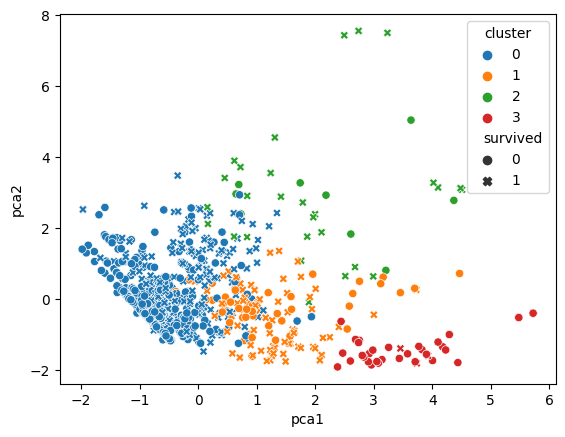

In [74]:
pca_data = pd.DataFrame(pca.transform(data_transformed), columns=["pca1", "pca2"])

pca_data["cluster"] = pd.Categorical(agglomerative_clustering.labels_)
pca_data["survived"] = pd.Categorical(survived)

sns.scatterplot(data=pca_data, x="pca1", y="pca2", hue="cluster", style="survived")

It looks like the aggregation algorithm with a ward linkage works better than with the others (single, complete, average). And it also works better than the KMeans algorithm but on the similar level as the GaussianMixture algorithm.

Let's also try the DBSCAN algorithm:

In [75]:
from sklearn.cluster import DBSCAN

In [78]:
dbscan = DBSCAN(eps=1, min_samples=2)
dbscan.fit(data_transformed)

DBSCAN(eps=1, min_samples=2)

<Axes: xlabel='pca1', ylabel='pca2'>

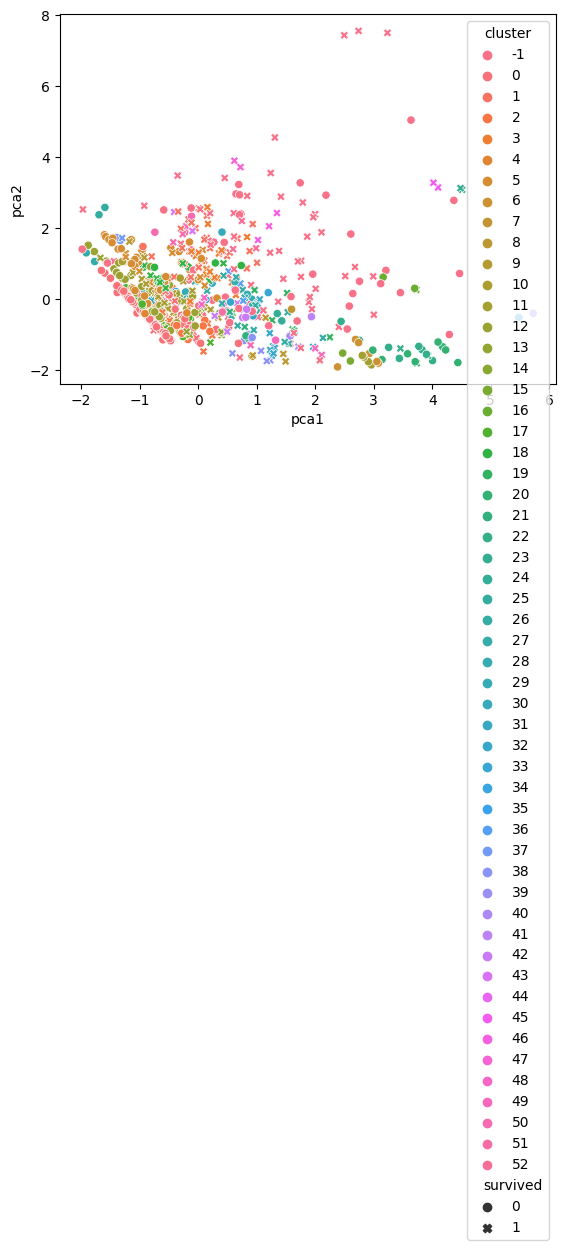

In [79]:
pca_data = pd.DataFrame(pca.transform(data_transformed), columns=["pca1", "pca2"])

pca_data["cluster"] = pd.Categorical(dbscan.labels_)
pca_data["survived"] = pd.Categorical(survived)

sns.scatterplot(data=pca_data, x="pca1", y="pca2", hue="cluster", style="survived")

In [92]:
dbscan = DBSCAN(eps=1.5, min_samples=2)
dbscan.fit(data_transformed)

DBSCAN(eps=1.5, min_samples=2)

<Axes: xlabel='pca1', ylabel='pca2'>

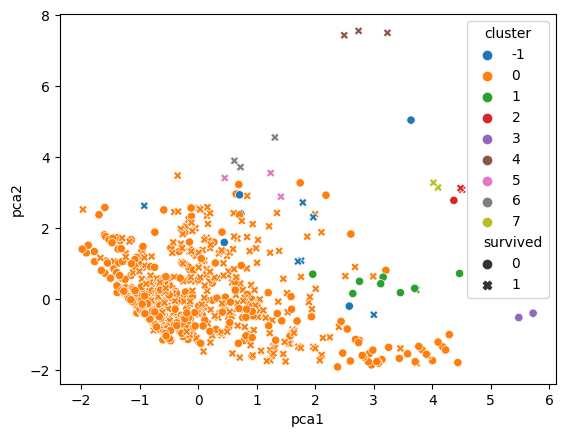

In [93]:
pca_data = pd.DataFrame(pca.transform(data_transformed), columns=["pca1", "pca2"])

pca_data["cluster"] = pd.Categorical(dbscan.labels_)
pca_data["survived"] = pd.Categorical(survived)

sns.scatterplot(data=pca_data, x="pca1", y="pca2", hue="cluster", style="survived")

So DBSCAN seems to be the worst algorithm for our dataset because of the high density of the dataset samples.

To sum up, we can say that the best algorithm for our dataset is the AgglomerativeClustering algorithm with a ward linkage due to the high density of the dataset samples.